<a href="https://colab.research.google.com/github/juanSalbarracin/DiplomadoGADIA/blob/main/Clusters_Trabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##LIBRERIAS 2

DIPLOMADO EN GOBIERNO Y ANALITICA DE DATOS

FUNDACION UNIVERSITARIA CAFAM

DOCENTE: NICOLAS MOJICA GOMEZ

ESTUDIANTE: JUAN SEBASTIAN ALBARRACIN

In [1]:
#Manipulacion de datos
import pandas as pd

#visualizacion de datos
import matplotlib.pyplot as plt

#Visualizacion de datos
import seaborn as sns

#manipulacion de datos
import numpy as np

In [2]:
# Instalacion de librerias

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv("/content/sample_data/Mall_Customers (2).csv")

In [5]:
dataset.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
"""
Analizando los datos y de acuerdo con el objetivo del centro comercial vamos a tomar
las variables de ingresos anuales y propension al gasto de los clientes para hacer el agrupamiento
"""
X = dataset.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

¿como decidir  la cantidad de cluster optima para mi conjunto de datos?


In [8]:
from sklearn.cluster import KMeans

In [12]:
"""Para determina la cantidad de clusters de un modelo k-means,
se utiliza la tecnica del codo, que es una grafica que representa
la relacion entre el numero de clusters y la suma de distancias de
cuadrados"""

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
wcss


[269981.28000000014,
 183653.3289473683,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 40825.16946386947,
 33642.57922077922,
 26686.837785187785,
 24766.471609793436,
 23103.122085983905]

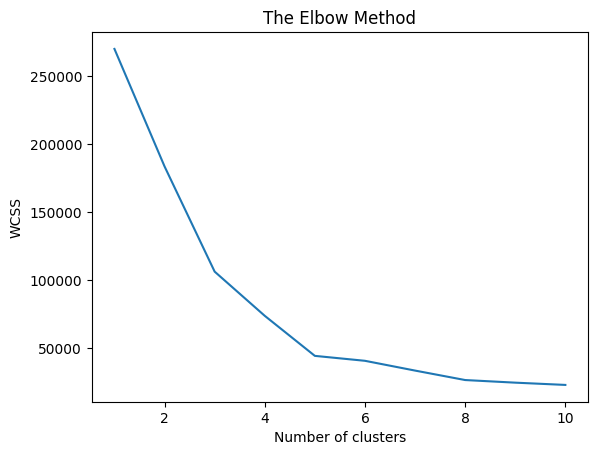

In [13]:
# Grafica del codo para la seleccion de clusters

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
""" Una ves obtengo mi grafica del codo selecciono la cantidad de cluster
en donde la curva sea plana. """

' Una ves obtengo mi grafica del codo selecciono la cantidad de cluster \nen donde la curva sea plana. '

In [18]:
# Entrenamiento del modelo de Kmeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
#aca se guarda el numero del cluster de cada registro
y_kmeans = kmeans.fit_predict(X)

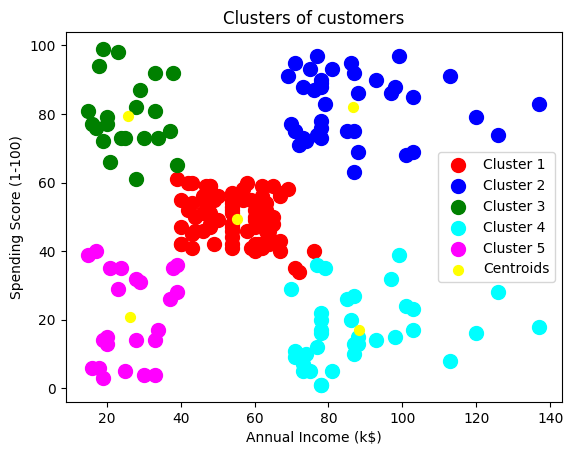

In [17]:
# Graficacion de resultados
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [22]:
# Insertar el cluster al registro correspondiente.
dataset.insert(column= "cluster",value=y_kmeans,loc= 5)

In [23]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [24]:
# exportar archivo con cluster a csv.
dataset.to_excel("/content/sample_data/segmentacion.xlsx")